<a href="https://colab.research.google.com/github/ggomez31/ML-Assignments/blob/main/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import scipy
import numpy as np
import os
import PIL
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, datasets
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

In [ ]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [ ]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
trainData = pd.read_csv('C:/Users/gomez/Downloads/cap-4611-spring-21-assignment-5/assignment5_training_data_metadata.csv', dtype="string")
testData = pd.read_csv('C:/Users/gomez/Downloads/cap-4611-spring-21-assignment-5/assignment5_test_data_metadata.csv', dtype="string")

In [ ]:
trainData.describe()

,id,image_name,label,cause,type
count,5286,5286,5286,69,3944
unique,5286,5286,2,4,3
top,329,person267_bacteria_1251.jpeg,Pnemonia,COVID-19,bacteria
freq,1,1,3944,58,2535


In [ ]:
print(trainData['type'].value_counts())

bacteria          2535
Virus             1407
Stress-Smoking       2
Name: type, dtype: Int64


In [ ]:
print(trainData['label'].value_counts())

Pnemonia    3944
Normal      1342
Name: label, dtype: Int64


In [ ]:
trainData['type'] = trainData['type'].fillna("Normal")

In [ ]:
print(trainData['type'].value_counts())

bacteria          2535
Virus             1407
Normal            1342
Stress-Smoking       2
Name: type, dtype: Int64


In [ ]:
batch_size = 64
img_rows, img_col = 180, 180

In [ ]:
datagen = ImageDataGenerator(rescale=1./255., horizontal_flip=True, validation_split=0.1) #rotation_range=10, brightness_range=[0.1,0.5] sheer_range=0.4, zoom_range=0.05
train_ds = datagen.flow_from_dataframe(
  dataframe=trainData,
  directory='C:/Users/gomez/Downloads/cap-4611-spring-21-assignment-5/images/images/train',
  subset="training",
  x_col='image_name',
  y_col='type',
  class_mode="categorical",
  color_mode="rgb",
  seed=123,
  shuffle=True,
  target_size=(img_rows, img_col),
  batch_size=batch_size)

Found 4758 validated image filenames belonging to 4 classes.


In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255.)
val_ds = datagen.flow_from_dataframe(
  dataframe=trainData,
  directory='C:/Users/gomez/Downloads/cap-4611-spring-21-assignment-5/images/images/train',
  subset="validation",
  x_col='image_name',
  y_col='type',
  class_mode="categorical",
  color_mode="rgb",
  seed=123,
  shuffle=False,
  target_size=(img_rows,img_col),
  batch_size=batch_size)

Found 528 validated image filenames belonging to 4 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255.)
test_ds = test_datagen.flow_from_dataframe(
  dataframe=testData,
  directory='C:/Users/gomez/Downloads/cap-4611-spring-21-assignment-5/images/test/test',
  x_col='image_name',
  y_col=None,
  class_mode=None,
  color_mode="rgb",
  shuffle=False,
  target_size=(img_rows,img_col),
  batch_size=batch_size
)

Found 624 validated image filenames.


In [ ]:
train_ds.class_indices

{'Normal': 0, 'Stress-Smoking': 1, 'Virus': 2, 'bacteria': 3}

In [ ]:
model = Sequential()
model.add(layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(img_rows,img_col,3)))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(128, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.1))
model.add(layers.Flatten())

In [ ]:
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 22, 22, 128)      

In [ ]:
with tf.device('/device:GPU:0'):
 history = model.fit(
      x=train_ds,
      epochs=10,
      verbose=2,
      validation_data=val_ds,
  )

Epoch 1/10
75/75 - 73s - loss: 0.7980 - accuracy: 0.6372 - val_loss: 0.4233 - val_accuracy: 0.8655
Epoch 2/10
75/75 - 42s - loss: 0.5619 - accuracy: 0.7541 - val_loss: 0.3527 - val_accuracy: 0.8845
Epoch 3/10
75/75 - 42s - loss: 0.5064 - accuracy: 0.7673 - val_loss: 0.1630 - val_accuracy: 0.9508
Epoch 4/10
75/75 - 42s - loss: 0.4945 - accuracy: 0.7791 - val_loss: 0.4729 - val_accuracy: 0.8504
Epoch 5/10
75/75 - 42s - loss: 0.4686 - accuracy: 0.7871 - val_loss: 0.3617 - val_accuracy: 0.8845
Epoch 6/10
75/75 - 42s - loss: 0.4457 - accuracy: 0.7949 - val_loss: 0.4932 - val_accuracy: 0.8561
Epoch 7/10
75/75 - 43s - loss: 0.4323 - accuracy: 0.8069 - val_loss: 0.1423 - val_accuracy: 0.9527
Epoch 8/10
75/75 - 43s - loss: 0.4183 - accuracy: 0.8024 - val_loss: 0.2834 - val_accuracy: 0.9148
Epoch 9/10
75/75 - 42s - loss: 0.4040 - accuracy: 0.8155 - val_loss: 0.2059 - val_accuracy: 0.9470
Epoch 10/10
75/75 - 42s - loss: 0.3905 - accuracy: 0.8220 - val_loss: 0.3300 - val_accuracy: 0.9053


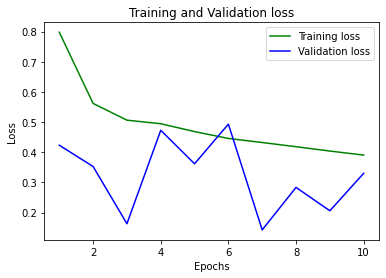

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

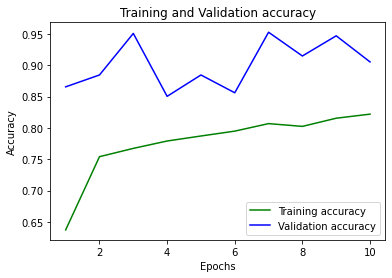

In [ ]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
with tf.device('/device:GPU:0'):
  model.evaluate(train_ds, verbose=1)

71/71 [==============================] - 22s 307ms/step - loss: 0.3306 - accuracy: 0.8598


In [ ]:
with tf.device('/device:GPU:0'):
  y_pred = np.argmax(model.predict(test_ds, verbose=1), axis=-1)

10/10 [==============================] - 10s 1s/step


In [ ]:
y_pred.tolist()

[3,
 2,
 2,
 2,
 3,
 2,
 3,
 2,
 2,
 0,
 2,
 2,
 2,
 3,
 2,
 2,
 0,
 3,
 0,
 2,
 2,
 3,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 3,
 2,
 0,
 0,
 2,
 3,
 2,
 0,
 2,
 2,
 3,
 0,
 0,
 0,
 2,
 3,
 0,
 3,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 3,
 2,
 0,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 3,
 0,
 2,
 2,
 0,
 2,
 0,
 3,
 0,
 3,
 3,
 3,
 3,
 2,
 0,
 2,
 0,
 3,
 0,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 3,
 3,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 2,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 3,
 2,
 3,
 3,
 2,
 2,
 2,
 2,
 0,
 0,
 3,
 3,
 3,
 2,
 3,
 2,
 0,
 2,
 3,
 2,
 3,
 3,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 3,
 2,
 0,
 2,
 0,
 0,
 3,
 3,
 2,
 3,
 2,
 2,
 2,
 0,
 0,
 2,
 3,
 0,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 2,
 3,
 3,
 3,
 2,
 3,
 2,


In [ ]:
df = pd.DataFrame({'id': testData.id, 'type':y_pred.tolist()})
toInt = {'type': {0: 1, 1: 4, 2: 2, 3: 3}}
df = df.replace(toInt)
df.to_csv('C:/Users/gomez/downloads/assignment5.csv', index=False)

In [ ]:
df

,id,type
0,5309,3
1,5310,2
2,5311,2
3,5312,2
4,5313,3
...,...,...
619,5928,2
620,5929,3
621,5930,3
622,5931,2


In [ ]:
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
0.9618738000000349
GPU (s):
0.0417306000000508
GPU speedup over CPU: 23x
